In [1]:
import pandas as pd
import yfinance as yf

In [2]:
symbol = 'AAPL'
start_date = '2010-01-01'
end_date ='2019-12-31'

In [3]:
data =yf.download(symbol,start=start_date,end=end_date)

[*********************100%***********************]  1 of 1 completed


In [4]:
data.reset_index(inplace=True)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496294,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507527,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404017,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392176,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434673,447610800


In [6]:
data = data.drop(['Date'], axis=1)
data.head()

,Open,High,Low,Close,Adj Close,Volume
0,7.622500,7.660714,7.585000,7.643214,6.496294,493729600
1,7.664286,7.699643,7.616071,7.656429,6.507527,601904800
2,7.656429,7.686786,7.526786,7.534643,6.404017,552160000
3,7.562500,7.571429,7.466071,7.520714,6.392176,477131200
4,7.510714,7.571429,7.466429,7.570714,6.434673,447610800


In [7]:
import matplotlib.pyplot as plt

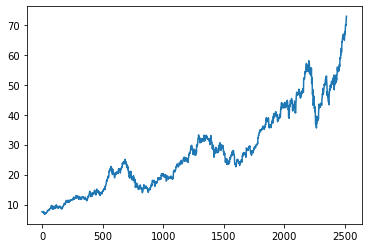

In [8]:
plt.plot(data.Close)

In [9]:
ma100 =data.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

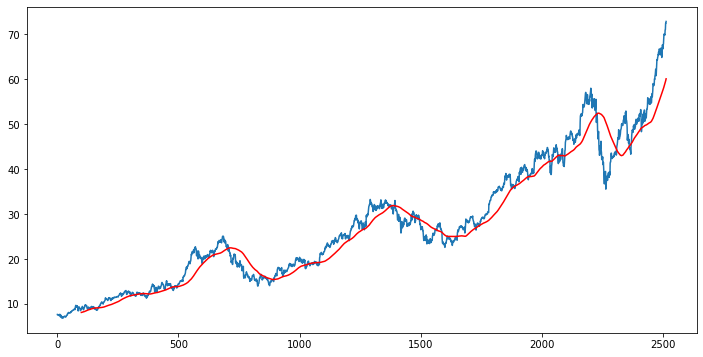

In [10]:
plt.figure(figsize =(12,6))
plt.plot(data.Close)
plt.plot(ma100,'r')

In [11]:
ma200=data.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

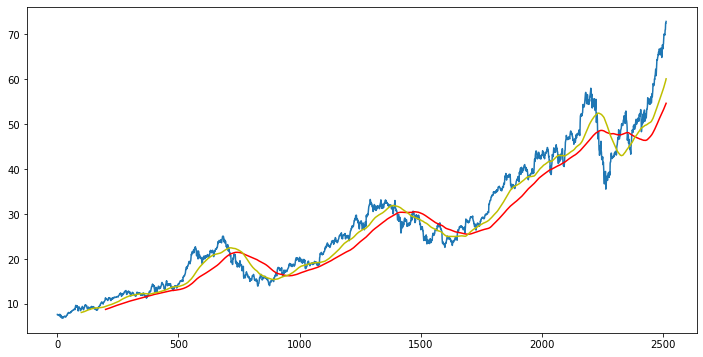

In [12]:
plt.figure(figsize =(12,6))
plt.plot(data.Close)
plt.plot(ma200,'r')
plt.plot(ma100,'y')

In [13]:
data.shape

(2515, 6)

In [14]:
data_training = pd.DataFrame(data['Close'][0:int(len(data)*0.70)])
data_testing = pd.DataFrame(data['Close'][int(len(data)*0.70): int(len(data))])

In [15]:
print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [16]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler(feature_range =(0,1))

In [17]:
data_training.head()


,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [18]:
data_training_array = scaler.fit_transform(data_training)


In [19]:
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [20]:
import numpy as np

In [21]:
x_train =[]
y_train =[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)    

In [22]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [26]:
model = Sequential()
model.add(LSTM(units=50,activation ='relu',return_sequences=True,
               input_shape =(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50,activation ='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=800,activation ='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation ='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_5 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 800)          2723200   
                                                                 
 dropout_6 (Dropout)         (None, 100, 800)          0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [ ]:
model.compile(optimizer='adam',loss ='mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
52/52 [==============================] - 150s 3s/step - loss: 0.0444
Epoch 2/50
52/52 [==============================] - 132s 3s/step - loss: 0.0103
Epoch 3/50
52/52 [==============================] - 131s 3s/step - loss: 0.0084
Epoch 4/50
52/52 [==============================] - 133s 3s/step - loss: 0.0079
Epoch 5/50
52/52 [==============================] - 132s 3s/step - loss: 0.0078
Epoch 6/50
52/52 [==============================] - 133s 3s/step - loss: 0.0076
Epoch 7/50
52/52 [==============================] - 131s 3s/step - loss: 0.0083
Epoch 8/50
52/52 [==============================] - 135s 3s/step - loss: 0.0069
Epoch 9/50
52/52 [==============================] - 134s 3s/step - loss: 0.0063
Epoch 10/50
52/52 [==============================] - 133s 3s/step - loss: 0.0069
Epoch 11/50
52/52 [==============================] - 133s 3s/step - loss: 0.0069
Epoch 12/50
52/52 [==============================] - 128s 2s/step - loss: 0.0065
Epoch 13/50
52/52 [==================

In [ ]:
model.save('keras_model.h5')

In [42]:
past_100_days = data_training.tail(100)

In [43]:
final_data= past_100_days.append(data_testing,ignore_index=True)

In [44]:
input_data = scaler.fit_transform(final_data)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [46]:
x_test =[]
y_test =[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    

In [47]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [48]:
#making predictions

y_predicted =model.predict(x_test)

24/24 [==============================] - 10s 407ms/step


In [49]:
scaler.scale_

array([0.02123255])

In [51]:
scale_factor =1/0.02123255 
y_predicted = y_predicted * scale_factor
y_test =y_test * scale_factor

<function matplotlib.pyplot.show(close=None, block=None)>

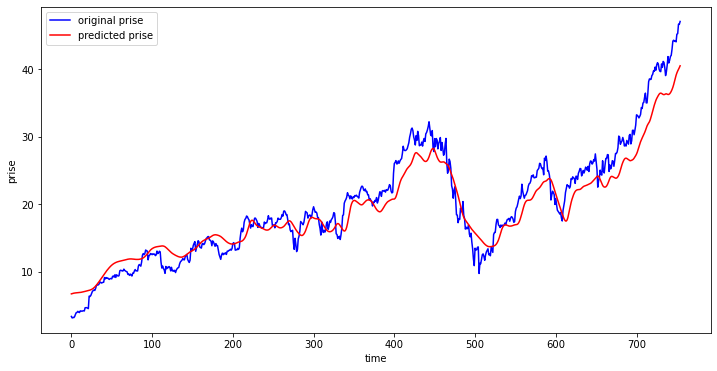

In [52]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label ='original prise')
plt.plot(y_predicted,'r',label ='predicted prise')
plt.xlabel('time')
plt.ylabel('prise')
plt.legend()
plt.show